# Librerías

In [8]:
import os
import io
import requests
import zipfile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from IPython.display import Markdown, display

# Conjunto de Datos y Mejor Modelo

In [24]:
# 1) Descargar y extraer imágenes externas de prueba
REPO_ZIP_URL = 'https://github.com/MatiasAni23/Modelos-Deep-Learning/archive/refs/heads/main.zip'
REPO_DIR     = 'Modelos-Deep-Learning-main'
IMG_DIR      = os.path.join(REPO_DIR, 'test_imgs')
if not os.path.isdir(IMG_DIR):
    resp = requests.get(REPO_ZIP_URL, stream=True); resp.raise_for_status()
    with zipfile.ZipFile(io.BytesIO(resp.content)) as z: z.extractall()

# Preprocesar imágenes externas
X_ext, y_ext = [], []
for fname in sorted(os.listdir(IMG_DIR)):
    if not fname.lower().endswith('.png'):
        continue
    label = int(fname.split('_')[0])
    img = Image.open(os.path.join(IMG_DIR, fname)).convert('L').resize((28,28))
    arr = np.array(img, float) / 255.0
    if arr.mean() > 0.5:
        arr = 1.0 - arr
    X_ext.append(arr.flatten())
    y_ext.append(label)
X_ext = np.stack(X_ext).astype('float32')
y_ext = np.array(y_ext, dtype=int)


# Descargar el mejor modelo desde GitHub (raw URL)
model_url = "https://raw.githubusercontent.com/OdysseyAngelo/DL/main/V2_Batch_Adam_mejor_modelo.h5"
model_path = "V2_Batch_Adam_mejor_modelo.h5"
if not os.path.exists(model_path):
    r = requests.get(model_url, stream=True); r.raise_for_status()
    with open(model_path, 'wb') as f:
        for chunk in r.iter_content(8192):
            f.write(chunk)

# Cargar y preprocesar SOLO el conjunto de test de MNIST
_, (x_test, y_test) = mnist.load_data()
X_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0
y_test = y_test

# Cargar el modelo HDF5
model = load_model(model_path)

# MNIST

### Classification Report sobre MNIST Test

              precision    recall  f1-score   support

           0     0.9838    0.9918    0.9878       980
           1     0.9921    0.9938    0.9930      1135
           2     0.9816    0.9826    0.9821      1032
           3     0.9662    0.9891    0.9775      1010
           4     0.9769    0.9898    0.9833       982
           5     0.9920    0.9720    0.9819       892
           6     0.9844    0.9854    0.9849       958
           7     0.9853    0.9805    0.9829      1028
           8     0.9814    0.9764    0.9789       974
           9     0.9899    0.9693    0.9795      1009

    accuracy                         0.9833     10000
   macro avg     0.9834    0.9831    0.9832     10000
weighted avg     0.9834    0.9833    0.9833     10000



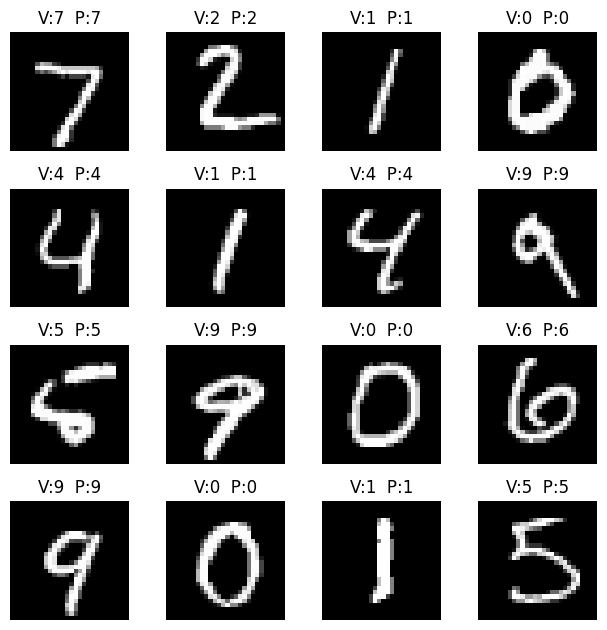

In [23]:
# Evaluar sobre MNIST test
probs_test  = model.predict(X_test, verbose=0)
y_pred_test = np.argmax(probs_test, axis=1)
display(Markdown("### Classification Report sobre MNIST Test"))
print(classification_report(y_test, y_pred_test, digits=4))

# Mostrar primeras 20 predicciones (MNIST Test)
num_display = min(16, X_test.shape[0])
cols = 4
rows = (num_display + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*1.6, rows*1.6))
axes = axes.flatten()

for i in range(num_display):
    axes[i].imshow(X_test[i].reshape(28,28), cmap='binary_r')
    axes[i].set_title(f"V:{y_test[i]}  P:{y_pred_test[i]}")
    axes[i].axis('off')

# Ocultar ejes sobrantes
for j in range(num_display, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Dataset Casero (gracias equipo 3)

### Classification Report sobre Imágenes Externas

              precision    recall  f1-score   support

           0     1.0000    0.7500    0.8571         4
           1     1.0000    0.2500    0.4000         4
           2     0.6667    1.0000    0.8000         4
           3     0.2000    0.5000    0.2857         4
           4     1.0000    1.0000    1.0000         4
           5     0.5000    1.0000    0.6667         4
           6     1.0000    1.0000    1.0000         4
           7     1.0000    0.2500    0.4000         4
           8     1.0000    0.5000    0.6667         4
           9     0.0000    0.0000    0.0000         4

    accuracy                         0.6250        40
   macro avg     0.7367    0.6250    0.6076        40
weighted avg     0.7367    0.6250    0.6076        40



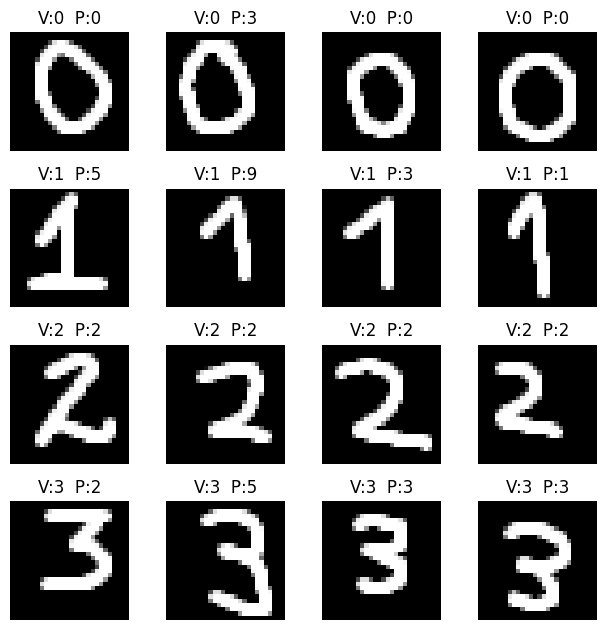

In [22]:
# Evaluar sobre imágenes externas
probs_ext  = model.predict(X_ext, verbose=0)
y_pred_ext = np.argmax(probs_ext, axis=1)
display(Markdown("### Classification Report sobre Imágenes Externas"))
print(classification_report(y_ext, y_pred_ext, digits=4))

# Mostrar grid 5×8 de primeras 40 predicciones (externas)
num_display = min(16, X_ext.shape[0])
cols = 4
rows = (num_display + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*1.6, rows*1.6))
axes = axes.flatten()

for i in range(num_display):
    axes[i].imshow(X_ext[i].reshape(28,28), cmap='binary_r')
    axes[i].set_title(f"V:{y_ext[i]}  P:{y_pred_ext[i]}")
    axes[i].axis('off')
for j in range(num_display, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()